In [56]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [57]:
term = "biology2"

# Download stopwords if not already downloaded
nltk.download('stopwords')
nltk.download('punkt_tab')

# Define a function to preprocess text
def preprocess_text(text):
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Convert text to lowercase
    text = text.lower()
    # Tokenize text
    words = word_tokenize(text, "english")
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    stop_words.update({term.lower(), "htmlhtml", "pdfpdf", "bookb", "citationc"})
    words = [word for word in words if word not in stop_words]
    return words

[nltk_data] Downloading package stopwords to /home/suna/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/suna/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [58]:
# Read the CSV file into a DataFrame
file_path = f'./{term}_google_scholar_results.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()

,title,authors,year,description,url,citations
0,"[BOOK][B] Tilapia: biology, culture, and nutri...","CD Webster, C Lim",2024,Learn to maximize tilapia production in differ...,https://books.google.com/books?hl=en&lr=&id=Wo...,330
1,[BOOK][B] A short guide to writing about biology,JA Pechenik,2024,"… ) in biology. In the first chapter, I emphas...",https://books.google.com/books?hl=en&lr=&id=g5...,182
2,Spatiotemporal omics for biology and medicine,"L Liu, A Chen, Y Li, J Mulder, H Heyn, X Xu",2024,The completion of the Human Genome Project has...,https://www.cell.com/cell/abstract/S0092-8674(...,24
3,Applying interpretable machine learning in com...,"V Chen, M Yang, W Cui, JS Kim, A Talwalkar, J Ma",2024,"… the landscape of computational biology, with...",https://www.nature.com/articles/s41592-024-023...,13
4,Biology,"WL Shelton, TJ Popma",2024,… Most fish culture literature follows the tax...,https://www.taylorfrancis.com/chapters/edit/10...,11


In [59]:
# Preprocess the text data
documents = df['title'].values

# Apply the preprocessing function to each document
documents = [preprocess_text(doc) for doc in documents]

# If preprocess_text returns a list of tokens, you might want to join them back into a single string
documents = [' '.join(doc) if isinstance(doc, list) else doc for doc in documents]

In [60]:
documents

['tilapia biology culture nutrition',
 'short guide writing biology',
 'spatiotemporal omics biology medicine',
 'applying interpretable machine learning computational biologypitfalls recommendations opportunities new developments',
 'biology',
 'biology mosquitoes volume 1 development nutrition reproduction',
 'sarscov2 variant biology immune escape transmission fitness',
 'functional biology sticklebacks',
 'transfer learning enables predictions network biology',
 'deciphering breast cancer biology clinic',
 'tissuespecific macrophages develop choreograph tissue biology',
 'biology trem receptors',
 'algorithms structural molecular biology',
 'predict cell specificity digital biology machine learning',
 'history biology',
 'cell biology ebook cell biology ebook',
 'defining roles specific reactive oxygen species ros cell biology physiology',
 'genetics obesity discovery biology',
 'hpvassociated oropharyngeal cancer epidemiology molecular biology clinical management',
 'structural bi

In [61]:
# Convert the text data to a matrix of token counts
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

# Fit the LDA model
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(X)

# Display the top words in each topic
n_top_words = 15
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic #{topic_idx}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

Topic #0:
biology cancer cell disease evolution advances cells molecular role ebook genetics discovery potential pathogenesis update

Topic #1:
biology cancer therapy cell pathophysiology predict database nutrition phase computational role clinical progression disease engineering

Topic #2:
biology clinical molecular opportunities structural cell physical management learning new data complex computational machine comparative

Topic #3:
biology applications principles medicine physical cell management learning mechanisms data bone review theory chemistry signaling

Topic #4:
biology cell molecular medicine biochemistry systems physiology tools biogenesis nanoparticles reproducibility deep quantum new chemical

Topic #5:
biology medicine synthetic chemistry health significance drug nanocarbons imaging delivery sensing phenomenon amyloid meets exposome

Topic #6:
biology systems history modelling function review synthetic replication update plant mechanisms disease implications sarscov2 r

In [62]:
# Convert the text data to TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# Apply K-Means clustering
num_clusters = 10
km = KMeans(n_clusters=num_clusters, random_state=42)
km.fit(tfidf_matrix)

# Assign each document to a cluster
clusters = km.labels_.tolist()

# Add the cluster assignments to the DataFrame
df['cluster'] = clusters

# Show the top five citations of each cluster
top_citations = df.groupby('cluster')['citations'].nlargest(3).reset_index(level=0, drop=True)
df.loc[top_citations.index].sort_values(by=['cluster', 'citations'], ascending=[True, False])

,title,authors,year,description,url,citations,cluster
137,"[BOOK][B] Randomization, bootstrap and Monte C...",BFJ Manly,2018,Modern computer-intensive statistical methods ...,https://www.taylorfrancis.com/books/mono/10.12...,10110,0
90,[BOOK][B] The struggle for existence: a classi...,GF Gause,2019,This work by Russian microbiologist GF Gause b...,https://books.google.com/books?hl=en&lr=&id=a_...,6273,0
61,[BOOK][B] Life in moving fluids: the physical ...,S Vogel,2020,"Both a landmark text and reference book, Steve...",https://books.google.com/books?hl=en&lr=&id=VO...,4612,0
91,[BOOK][B] An introduction to systems biology: ...,U Alon,2019,"… simplifying principles, but biology is astou...",https://api.taylorfrancis.com/content/books/mo...,4876,1
141,[BOOK][B] Introduction to computational biolog...,MS Waterman,2018,Biology is in the midst of a era yielding many...,https://www.taylorfrancis.com/books/mono/10.12...,2005,1
37,Primate conservation biology,"G Cowlishaw, R Dunbar",2021,… biology the lessons we learn. Our approach i...,https://books.google.com/books?hl=en&lr=&id=Yh...,888,1
138,Shedding light on the cell biology of extracel...,"G Van Niel, G d'Angelo, G Raposo",2018,Extracellular vesicles are a heterogeneous gro...,https://www.nature.com/articles/nrm.2017.125.,7249,2
94,Mesenchymal stem cell perspective: cell biolog...,"MF Pittenger, DE Discher, BM Péault",2019,… MSCs have become widely studied over the pas...,https://www.nature.com/articles/s41536-019-0083-6,1679,2
96,T follicular helper cell biology: a decade of ...,S Crotty,2019,Helping B cells and antibody responses is a ma...,https://www.cell.com/immunity/fulltext/S1074-7...,1392,2
140,Opportunities and obstacles for deep learning ...,"T Ching, DS Himmelstein",2018,Deep learning describes a class of machine lea...,https://royalsocietypublishing.org/doi/abs/10....,2300,3


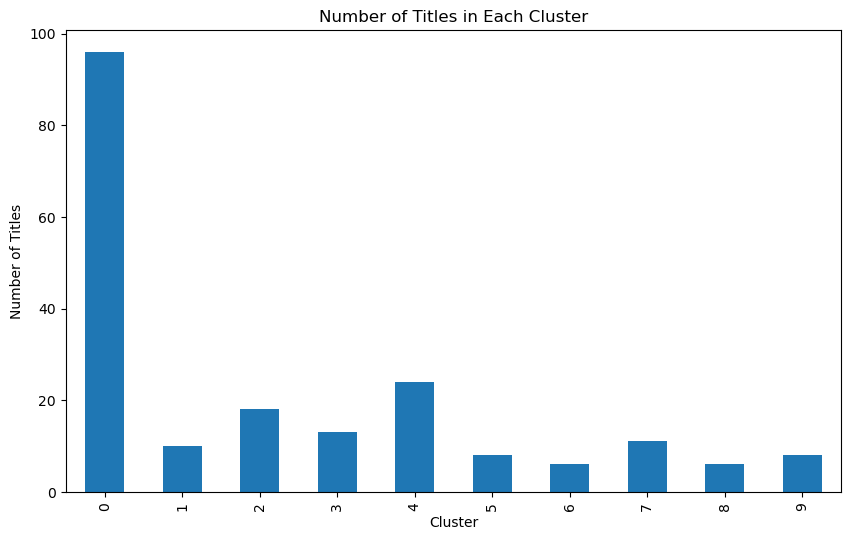

In [63]:
# Bar chart for the number of titles in each cluster
cluster_counts = df['cluster'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
cluster_counts.plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Number of Titles')
plt.title('Number of Titles in Each Cluster')
plt.show()

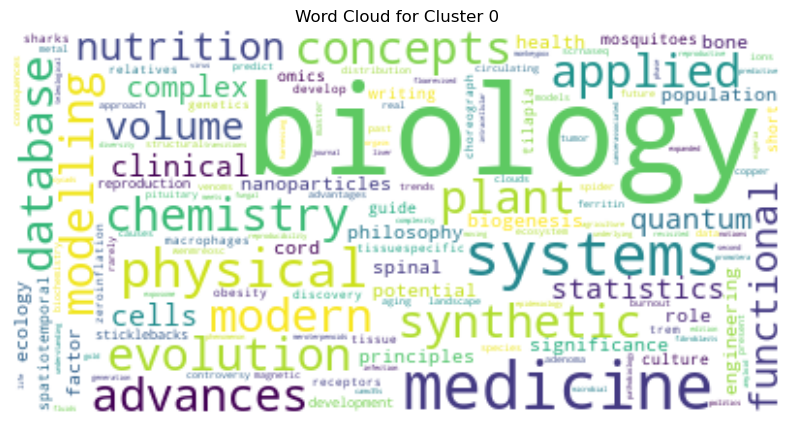

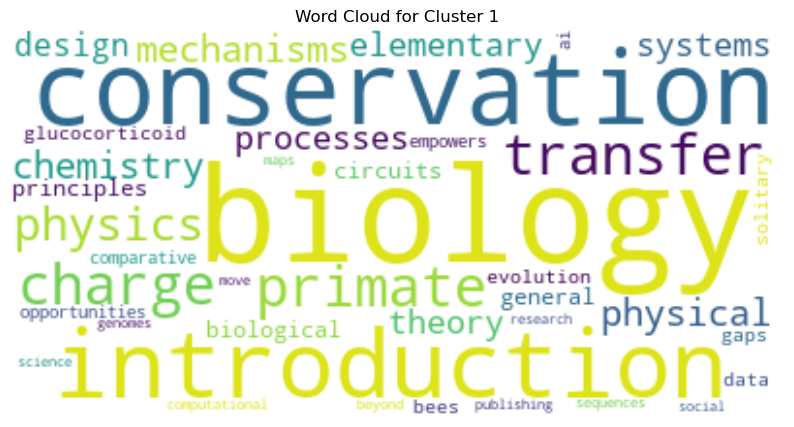

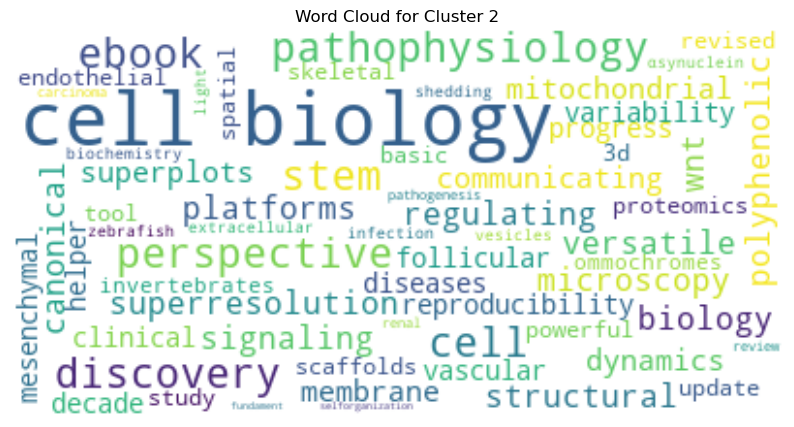

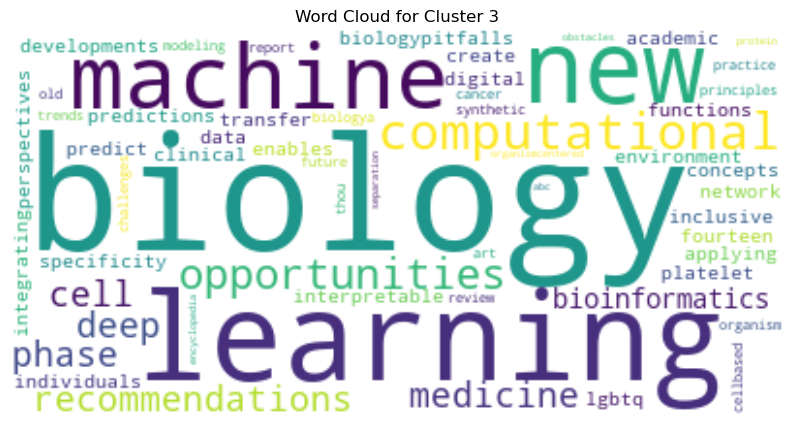

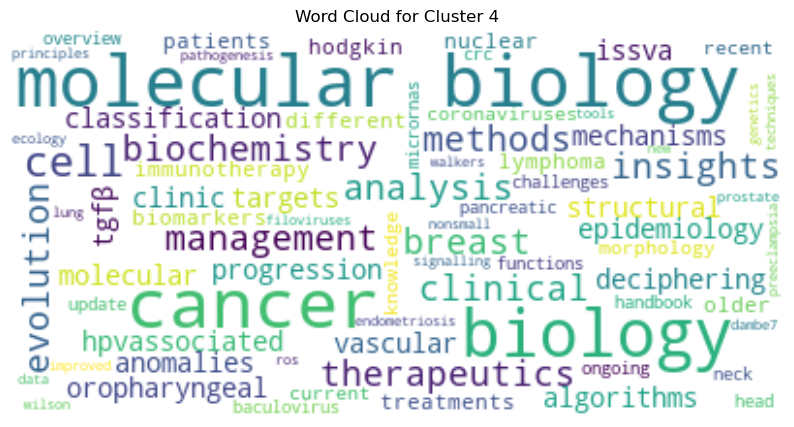

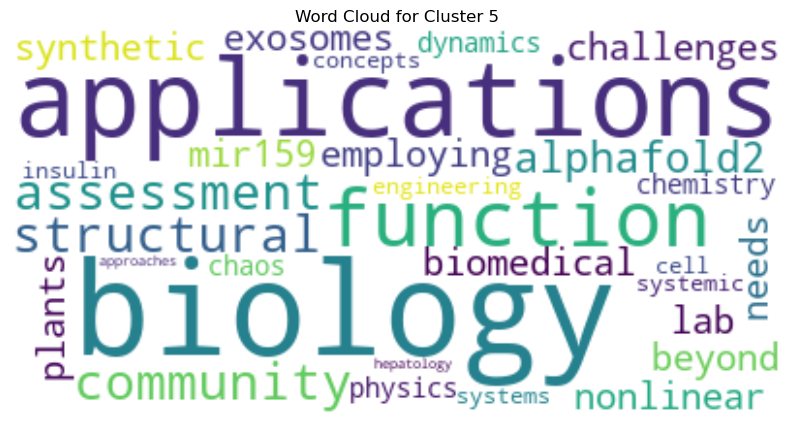

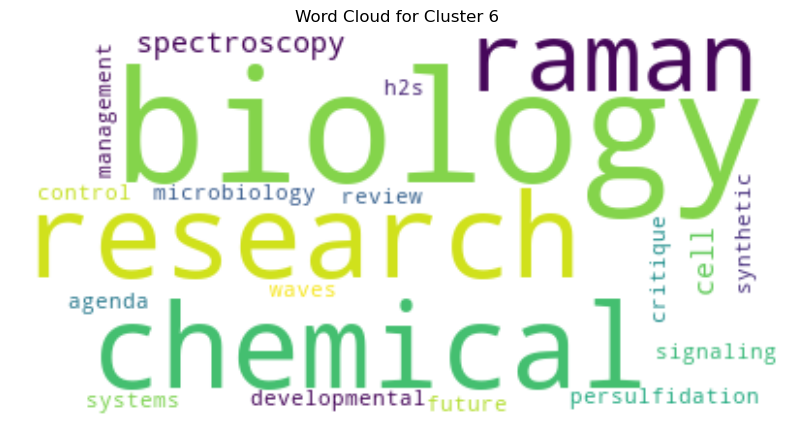

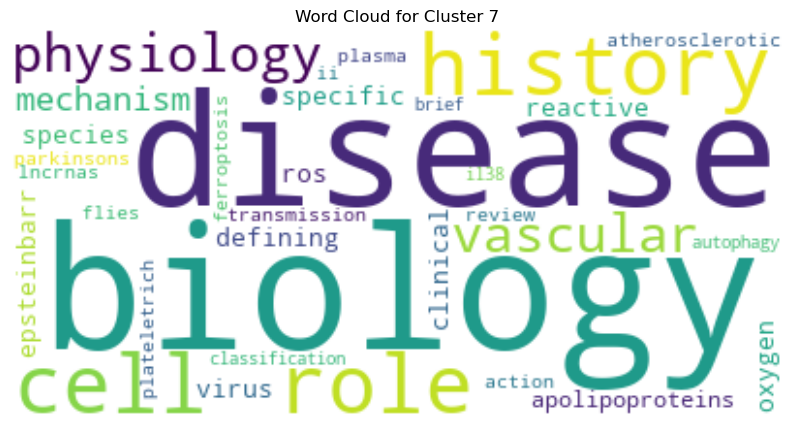

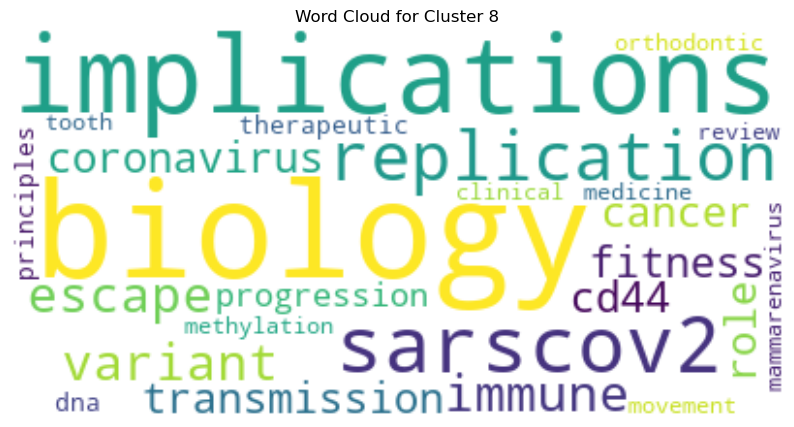

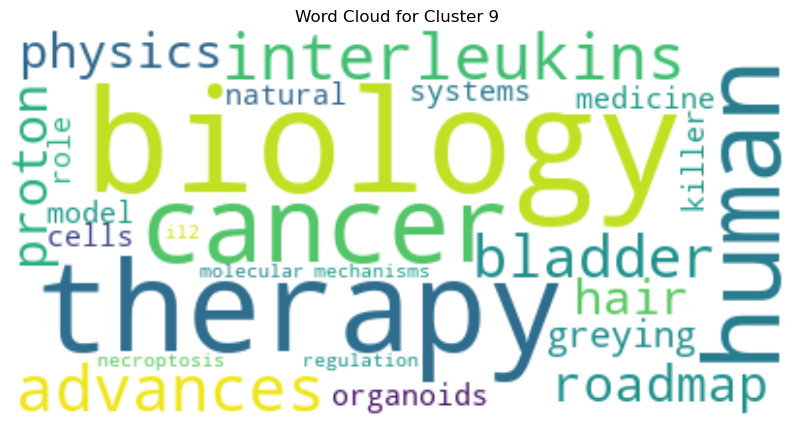

In [64]:
# Assuming df['Cluster'] already exists and documents is a list of strings
df_documents = pd.DataFrame({'Document': documents, 'Cluster': df['cluster']})

# Generate word clouds for each cluster
for cluster in range(num_clusters):
    cluster_docs = df_documents[df_documents['Cluster'] == cluster]['Document']
    cluster_words = ' '.join(cluster_docs)
    wordcloud = WordCloud(stopwords={'english', 'finance'}, background_color='white').generate(cluster_words)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Cluster {cluster}')
    plt.show()

In [65]:
# Function to extract text in square brackets from the beginning of a string
def extract_brackets(text):
    if pd.isna(text):  # Handle NaN values
        return None
    match = re.match(r'^\[(.*?)\]', str(text))
    return match.group(1) if match else None

# Create new column with bracketed text
df['type'] = df['title'].apply(extract_brackets)

In [66]:
# Function to remove all square brackets and their contents from the beginning
def clean_title(text):
    if pd.isna(text):
        return None
    return re.sub(r'^\[.*?\]\s*(?:\[.*?\]\s*)*', '', str(text)).strip()

In [67]:
df['clean_title'] = df['title'].apply(clean_title)

# Count words (splitting by whitespace)
df['word_count'] = df['clean_title'].str.split().str.len()

# Count characters (excluding spaces)
df['char_count'] = df['clean_title'].str.replace(' ', '').str.len()

In [68]:
df.head()

,title,authors,year,description,url,citations,cluster,type,clean_title,word_count,char_count
0,"[BOOK][B] Tilapia: biology, culture, and nutri...","CD Webster, C Lim",2024,Learn to maximize tilapia production in differ...,https://books.google.com/books?hl=en&lr=&id=Wo...,330,0,BOOK,"Tilapia: biology, culture, and nutrition",5,36
1,[BOOK][B] A short guide to writing about biology,JA Pechenik,2024,"… ) in biology. In the first chapter, I emphas...",https://books.google.com/books?hl=en&lr=&id=g5...,182,0,BOOK,A short guide to writing about biology,7,32
2,Spatiotemporal omics for biology and medicine,"L Liu, A Chen, Y Li, J Mulder, H Heyn, X Xu",2024,The completion of the Human Genome Project has...,https://www.cell.com/cell/abstract/S0092-8674(...,24,0,None,Spatiotemporal omics for biology and medicine,6,40
3,Applying interpretable machine learning in com...,"V Chen, M Yang, W Cui, JS Kim, A Talwalkar, J Ma",2024,"… the landscape of computational biology, with...",https://www.nature.com/articles/s41592-024-023...,13,3,None,Applying interpretable machine learning in com...,13,117
4,Biology,"WL Shelton, TJ Popma",2024,… Most fish culture literature follows the tax...,https://www.taylorfrancis.com/chapters/edit/10...,11,0,None,Biology,1,7


In [69]:
# Save the updated DataFrame with cluster information to a new CSV file
df.to_csv(f'./{term}_google_scholar_results_v2.csv', index=False)

In [ ]:
# df1 = pd.read_csv(f'./health2_google_scholar_results_v2.csv')
# df2 = pd.read_csv(f'./biology2_google_scholar_results_v2.csv')
# df3 = pd.read_csv(f'./nutrition_google_scholar_results_v2.csv')

# # Add a 'category' column to each dataframe before merging
# df1['category'] = 'health'
# df2['category'] = 'biology'
# df3['category'] = 'nutrition'

# # Merge the datasets
# merged_df = pd.concat([df1, df2], ignore_index=True, )

# # Shape of the merged DataFrame
# print(merged_df.shape)

# # Display the first few rows of the merged DataFrame
# merged_df.head()

(400, 12)


,title,authors,year,description,url,citations,cluster,type,clean_title,word_count,char_count,category
0,[BOOK][B] Health measurement scales: a practic...,"DL Streiner, GR Norman, J Cairney",2024,… The intent of this book is to introduce rese...,https://books.google.com/books?hl=en&lr=&id=pb...,21116,1,BOOK,Health measurement scales: a practical guide t...,11,63,health
1,[BOOK][B] An occupational perspective of health,"A Wilcock, C Hocking",2024,… health are both biological in origin and rel...,https://books.google.com/books?hl=en&lr=&id=uZ...,3129,1,BOOK,An occupational perspective of health,5,33,health
2,[BOOK][B] The economics of health and health care,"S Folland, AC Goodman, M Stano, S Danagoulian",2024,… new chapters: Disparities in Health and Heal...,https://www.taylorfrancis.com/books/mono/10.43...,2531,1,BOOK,The economics of health and health care,7,33,health
3,[BOOK][B] Epidemiology and the people's health...,N Krieger,2024,"… of Health, 2012), social inequalities in hea...",https://books.google.com/books?hl=en&lr=&id=qe...,1406,1,BOOK,Epidemiology and the people's health: theory a...,8,49,health
4,[BOOK][B] Health inequality: an introduction t...,"M Bartley, M Kelly",2024,… Gender inequalities in health Macrolevel fac...,https://books.google.com/books?hl=en&lr=&id=Yf...,1216,1,BOOK,Health inequality: an introduction to concepts...,9,60,health


In [ ]:
# Save the updated DataFrame with cluster information to a new CSV file
# merged_df.to_csv(f'./dataset.csv', index=False)